In [185]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False 

poplu=pd.read_csv('../data/2016-2017gnorth.csv', thousands=',', encoding='euc-kr')
poplu2=pd.read_csv('../data/2016gnorth.csv', thousands=',', encoding='euc-kr')
poplu3=pd.read_csv('../data/2017gnorth.csv', thousands=',', encoding='euc-kr')
poplu.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,NaN,NaN,NaN
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,NaN,NaN,NaN
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,NaN,NaN,NaN
3,279,2016-01-04,0.7,-5.1,9.3,42.0,NaN,NaN,NaN
4,279,2016-01-05,2.1,-4.1,9.1,51.0,NaN,NaN,NaN


In [186]:
for i in poplu.index:
    if poplu.values[i,2] < 17 :
        if poplu.values[i,5] >70:
            poplu['습도위험지수'].values[i] = '1'
        elif 59< poplu.values[i,5] <70:
            poplu['습도위험지수'].values[i] = '2'
        elif 49< poplu.values[i,5] <60:
            poplu['습도위험지수'].values[i] = '3'
        else:
            poplu['습도위험지수'].values[i] = '4'
            
    elif 17<poplu.values[i,2] < 21:
        if poplu.values[i,5] >60:
            poplu['습도위험지수'].values[i] = '1'
        elif 49< poplu.values[i,5] <60:
            poplu['습도위험지수'].values[i] = '2'
        elif 39< poplu.values[i,5] <50:
            poplu['습도위험지수'].values[i] = '3'
        else:
            poplu['습도위험지수'].values[i] = '4'
            
    elif 20<poplu.values[i,2] < 24:
        if poplu.values[i,5] >50:
            poplu['습도위험지수'].values[i] = '1'
        elif 39< poplu.values[i,5] <50:
            poplu['습도위험지수'].values[i] = '2'
        elif 29< poplu.values[i,5] <40:
            poplu['습도위험지수'].values[i] = '3'
        else:
            poplu['습도위험지수'].values[i] = '4' 
            
    elif poplu.values[i,2] > 23:
        if poplu.values[i,5] >40:
            poplu['습도위험지수'].values[i] = '1'
        elif 29< poplu.values[i,5] <40:
            poplu['습도위험지수'].values[i] = '2'
        elif 19< poplu.values[i,5] <30:
            poplu['습도위험지수'].values[i] = '3'
        else:
            poplu['습도위험지수'].values[i] = '4'
    
poplu.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,NaN,NaN,4.0
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,NaN,NaN,4.0
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,NaN,NaN,4.0
3,279,2016-01-04,0.7,-5.1,9.3,42.0,NaN,NaN,4.0
4,279,2016-01-05,2.1,-4.1,9.1,51.0,NaN,NaN,3.0


In [187]:
poplu['일교차'] = poplu['최고기온(°C)'] -  poplu['최저기온(°C)']
poplu2['일교차'] = poplu2['최고기온(°C)'] -  poplu2['최저기온(°C)']
poplu3['일교차'] = poplu3['최고기온(°C)'] -  poplu3['최저기온(°C)']

In [188]:
for i in poplu.index:
    if poplu.values[i,3] <-4.8 or 30<=poplu.values[1,2]:
        poplu['최저기온위험지수'].values[i] = '4' 
    elif -4.8<=poplu.values[i,3] <1.6:
        poplu['최저기온위험지수'].values[i] = '3' 
    elif 1.6<=poplu.values[i,3] <13.8:
        poplu['최저기온위험지수'].values[i] = '2'  
    elif 13.8< poplu.values[i,3] <30:
        poplu['최저기온위험지수'].values[i] = '1'  
        
    if poplu.values[i,9] < 8.7 : 
        poplu['일교차위험지수'].values[i] = '1' 
    elif 8.7<= poplu.values[i,9] < 12: 
        poplu['일교차위험지수'].values[i] = '2' 
    elif 12<=poplu.values[i,9] < 15.5:  
        poplu['일교차위험지수'].values[i] = '3' 
    elif 15.5<= poplu.values[i,9] : 
        poplu['일교차위험지수'].values[i] = '4' 

poplu.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,4.0,1.0,4.0,6.5
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,4.0,1.0,4.0,7.0
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,4.0,3.0,4.0,12.8
3,279,2016-01-04,0.7,-5.1,9.3,42.0,4.0,3.0,4.0,14.4
4,279,2016-01-05,2.1,-4.1,9.1,51.0,3.0,3.0,3.0,13.2


In [189]:
for i in poplu2.index:
    if poplu2.values[i,2] < 17 :
        if poplu2.values[i,5] >70:
            poplu2['습도위험지수'].values[i] = '1'
        elif 59< poplu2.values[i,5] <70:
            poplu2['습도위험지수'].values[i] = '2'
        elif 49< poplu2.values[i,5] <60:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
    elif 17<poplu2.values[i,2] < 21:
        if poplu2.values[i,5] >60:
            poplu2['습도위험지수'].values[i] = '1'
        elif 49< poplu2.values[i,5] <60:
            poplu2['습도위험지수'].values[i] = '2'
        elif 39< poplu2.values[i,5] <50:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
            
    elif 20<poplu2.values[i,2] < 24:
        if poplu2.values[i,5] >50:
            poplu2['습도위험지수'].values[i] = '1'
        elif 39< poplu2.values[i,5] <50:
            poplu2['습도위험지수'].values[i] = '2'
        elif 29< poplu2.values[i,5] <40:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
    elif poplu2.values[i,2] > 23:
        if poplu2.values[i,5] >40:
            poplu2['습도위험지수'].values[i] = '1'
        elif 29< poplu2.values[i,5] <40:
            poplu2['습도위험지수'].values[i] = '2'
        elif 19< poplu2.values[i,5] <30:
            poplu2['습도위험지수'].values[i] = '3'
        else:
            poplu2['습도위험지수'].values[i] = '4'
poplu2.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,NaN,NaN,4.0,6.5
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,NaN,NaN,4.0,7.0
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,NaN,NaN,4.0,12.8
3,279,2016-01-04,0.7,-5.1,9.3,42.0,NaN,NaN,4.0,14.4
4,279,2016-01-05,2.1,-4.1,9.1,51.0,NaN,NaN,3.0,13.2


In [190]:
for i in poplu3.index:
    if poplu3.values[i,2] < 17 :
        if poplu3.values[i,5] >70:
            poplu3['습도위험지수'].values[i] = '1'
        elif 59< poplu3.values[i,5] <70:
            poplu3['습도위험지수'].values[i] = '2'
        elif 49< poplu3.values[i,5] <60:
            poplu3['습도위험지수'].values[i] = '3'
        else:
            poplu3['습도위험지수'].values[i] = '4'
    elif 17<poplu3.values[i,2] < 21:
        if poplu3.values[i,5] >60:
            poplu3['습도위험지수'].values[i] = '1'
        elif 49< poplu3.values[i,5] <60:
            poplu3['습도위험지수'].values[i] = '2'
        elif 39< poplu3.values[i,5] <50:
            poplu3['습도위험지수'].values[i] = '3'
        else:
            poplu3['습도위험지수'].values[i] = '4'
            
    elif 20<poplu3.values[i,2] < 24:
        if poplu3.values[i,5] >50:
            poplu3['습도위험지수'].values[i] = '1'
        elif 39< poplu3.values[i,5] <50:
            poplu3['습도위험지수'].values[i] = '2'
        elif 29< poplu3.values[i,5] <40:
            poplu3['습도위험지수'].values[i] = '3'
        else:
            poplu3['습도위험지수'].values[i] = '4'
    elif poplu3.values[i,2] > 23:
        if poplu3.values[i,5] >40:
            poplu3['습도위험지수'].values[i] = '1'
        elif 29< poplu3.values[i,5] <40:
            poplu3['습도위험지수'].values[i] = '2'
        elif 19< poplu3.values[i,5] <30:
            poplu3['습도위험지수'].values[i] = '3'
        else:
            poplu3['습도위험지수'].values[i] = '4'
poplu3.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,184,2017-01-01,8.2,5.2,10.8,54.0,NaN,NaN,3.0,5.6
1,184,2017-01-02,12.5,7.8,16.8,46.0,NaN,NaN,4.0,9.0
2,184,2017-01-03,13.0,10.5,16.2,43.0,NaN,NaN,4.0,5.7
3,184,2017-01-04,11.7,10.9,12.9,49.0,NaN,NaN,4.0,2.0
4,184,2017-01-05,8.5,6.6,11.1,40.0,NaN,NaN,4.0,4.5


In [191]:
poplu2['일교차'] = poplu2['최고기온(°C)'] -  poplu2['최저기온(°C)']
poplu3['일교차'] = poplu3['최고기온(°C)'] -  poplu3['최저기온(°C)']
poplu2.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,NaN,NaN,4.0,6.5
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,NaN,NaN,4.0,7.0
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,NaN,NaN,4.0,12.8
3,279,2016-01-04,0.7,-5.1,9.3,42.0,NaN,NaN,4.0,14.4
4,279,2016-01-05,2.1,-4.1,9.1,51.0,NaN,NaN,3.0,13.2


In [192]:
for i in poplu2.index:    
    if poplu2.values[i,3] <-4.8 or 30<=poplu2.values[1,2]:
        poplu2['최저기온위험지수'].values[i] = '4' 
    elif -4.8<=poplu2.values[i,3] <1.6:
        poplu2['최저기온위험지수'].values[i] = '3' 
    elif 1.6<=poplu2.values[i,3] <13.8:
        poplu2['최저기온위험지수'].values[i] = '2'  
    elif 13.8< poplu2.values[i,3] <30:
        poplu2['최저기온위험지수'].values[i] = '1'  
        
    if poplu2.values[i,9] < 8.7 : 
        poplu2['일교차위험지수'].values[i] = '1' 
    elif 8.7<= poplu2.values[i,9] < 12: 
        poplu2['일교차위험지수'].values[i] = '2'  
    elif 12<=poplu2.values[i,9] < 15.5:  
        poplu2['일교차위험지수'].values[i] = '3'  
    elif 15.5<= poplu2.values[i,9] : 
        poplu2['일교차위험지수'].values[i] = '4' 

poplu2.head(10)

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,279,2016-01-01,-4.7,-7.9,-1.4,35.0,4.0,1.0,4.0,6.5
1,279,2016-01-02,-2.5,-6.2,0.8,30.0,4.0,1.0,4.0,7.0
2,279,2016-01-03,-2.1,-8.7,4.1,33.0,4.0,3.0,4.0,12.8
3,279,2016-01-04,0.7,-5.1,9.3,42.0,4.0,3.0,4.0,14.4
4,279,2016-01-05,2.1,-4.1,9.1,51.0,3.0,3.0,3.0,13.2
5,279,2016-01-06,2.6,-2.8,5.8,27.0,3.0,1.0,4.0,8.6
6,279,2016-01-07,-2.3,-5.0,1.8,27.0,4.0,1.0,4.0,6.8
7,279,2016-01-08,-1.3,-7.7,4.0,27.0,4.0,2.0,4.0,11.7
8,279,2016-01-09,1.4,-4.5,5.6,42.0,3.0,2.0,4.0,10.1
9,279,2016-01-10,2.3,-1.9,7.1,31.0,3.0,2.0,4.0,9.0


In [193]:
for i in poplu3.index:    
    if poplu3.values[i,3] <-4.8 or 30<=poplu3.values[1,2]:
        poplu3['최저기온위험지수'].values[i] = '4' 
    elif -4.8<=poplu3.values[i,3] <1.6:
        poplu3['최저기온위험지수'].values[i] = '3' 
    elif 1.6<=poplu3.values[i,3] <13.8:
        poplu3['최저기온위험지수'].values[i] = '2'  
    elif 13.8< poplu3.values[i,3] <30:
        poplu3['최저기온위험지수'].values[i] = '1'  
        
    if poplu3.values[i,9] < 8.7 : 
        poplu3['일교차위험지수'].values[i] = '1' 
    elif 8.7<= poplu3.values[i,9] < 12: 
        poplu3['일교차위험지수'].values[i] = '2'  
    elif 12<=poplu3.values[i,9] < 15.5:  
        poplu3['일교차위험지수'].values[i] = '3'  
    elif 15.5<= poplu3.values[i,9] : 
        poplu3['일교차위험지수'].values[i] = '4' 

poplu3.head(10)

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),최저기온위험지수,일교차위험지수,습도위험지수,일교차
0,184,2017-01-01,8.2,5.2,10.8,54.0,2.0,1.0,3.0,5.6
1,184,2017-01-02,12.5,7.8,16.8,46.0,2.0,2.0,4.0,9.0
2,184,2017-01-03,13.0,10.5,16.2,43.0,2.0,1.0,4.0,5.7
3,184,2017-01-04,11.7,10.9,12.9,49.0,2.0,1.0,4.0,2.0
4,184,2017-01-05,8.5,6.6,11.1,40.0,2.0,1.0,4.0,4.5
5,184,2017-01-06,7.3,5.7,8.7,49.0,2.0,1.0,4.0,3.0
6,184,2017-01-07,7.0,6.3,8.2,47.0,2.0,1.0,4.0,1.9
7,184,2017-01-08,6.0,4.4,7.5,45.0,2.0,1.0,4.0,3.1
8,184,2017-01-09,7.0,5.6,8.3,47.0,2.0,1.0,4.0,2.7
9,184,2017-01-10,8.1,6.4,10.9,47.0,2.0,1.0,4.0,4.5


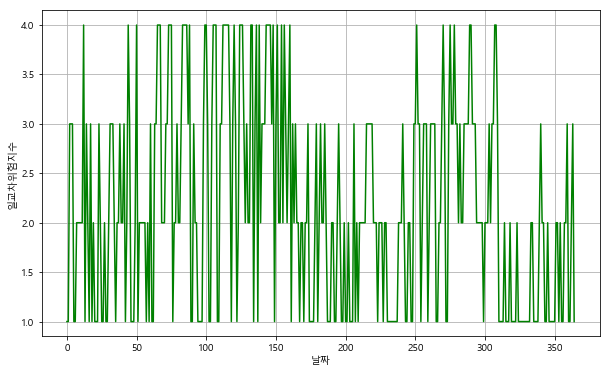

In [194]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['일교차위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('일교차위험지수')
plt.grid()
plt.show()

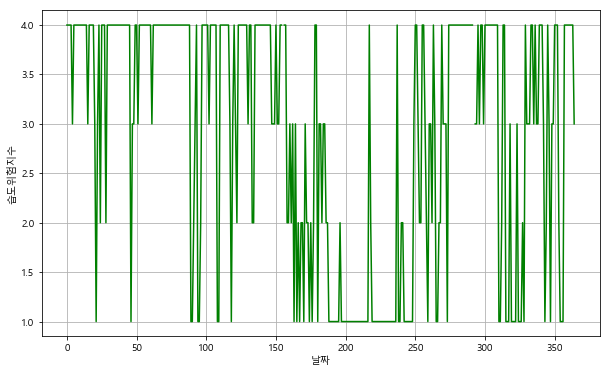

In [195]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['습도위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('습도위험지수')
plt.grid()
plt.show()

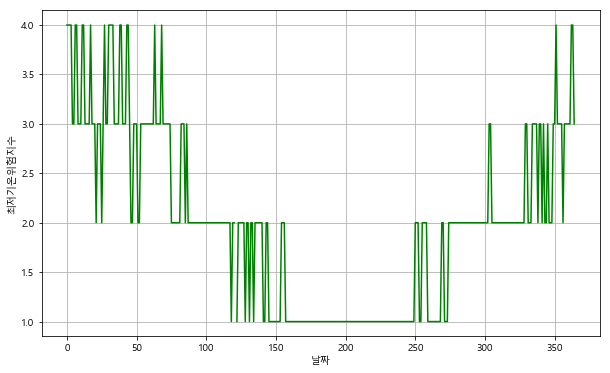

In [196]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['최저기온위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('최저기온위험지수')
plt.grid()
plt.show()

In [227]:
poplu4=pd.read_csv('../data/2016ojeon.csv', thousands=',', encoding='euc-kr')
poplu5=pd.read_csv('../data/2017ojeon.csv', thousands=',', encoding='euc-kr')
poplu6=pd.read_csv('../data/2016-2017ojeon.csv', thousands=',', encoding='euc-kr')
poplu4.head()

,일시,평균 오존전량(DU),오존위험지수
0,2016-01-01,354.9,NaN
1,2016-01-02,365.5,NaN
2,2016-01-03,373.2,NaN
3,2016-01-04,339.8,NaN
4,2016-01-05,269.9,NaN


In [228]:
for i in poplu6.index:    
    if poplu6.values[i,1] < 300:
        poplu6['오존위험지수'].values[i] = '1'
    elif 300<=poplu6.values[i,1] <348.7:
        poplu6['오존위험지수'].values[i] = '2'
    elif 348.7<=poplu6.values[i,1] <386.4:
        poplu6['오존위험지수'].values[i] = '3'
    elif 386.4<= poplu6.values[i,1]:
        poplu6['오존위험지수'].values[i] = '4'


In [229]:
for i in poplu4.index:    
    if poplu4.values[i,1] < 300:
        poplu4['오존위험지수'].values[i] = '1'
    elif 300<=poplu4.values[i,1] <348.7:
        poplu4['오존위험지수'].values[i] = '2'
    elif 348.7<=poplu4.values[i,1] <386.4:
        poplu4['오존위험지수'].values[i] = '3'
    elif 386.4<= poplu4.values[i,1]:
        poplu4['오존위험지수'].values[i] = '4'
        
    if poplu5.values[i,1] < 300:
        poplu5['오존위험지수'].values[i] = '1'
    elif 300<=poplu5.values[i,1] <348.7:
        poplu5['오존위험지수'].values[i] = '2'
    elif 348.7<=poplu5.values[i,1] <386.4:
        poplu5['오존위험지수'].values[i] = '3'
    elif 386.4<= poplu5.values[i,1]:
        poplu5['오존위험지수'].values[i] = '4'
        
poplu4.head()

,일시,평균 오존전량(DU),오존위험지수
0,2016-01-01,354.9,3.0
1,2016-01-02,365.5,3.0
2,2016-01-03,373.2,3.0
3,2016-01-04,339.8,2.0
4,2016-01-05,269.9,1.0


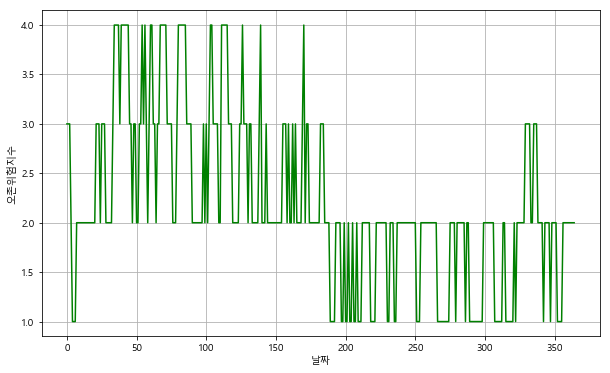

In [230]:
plt.figure(figsize=(10,6))
plt.plot(poplu4.index,poplu4['오존위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('오존위험지수')
plt.grid()
plt.show()

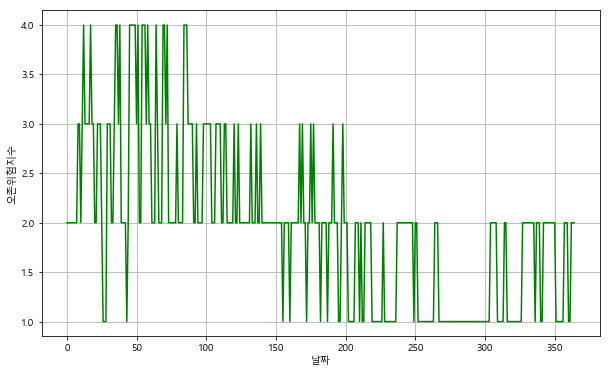

In [231]:
plt.figure(figsize=(10,6))
plt.plot(poplu5.index,poplu5['오존위험지수'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('오존위험지수')
plt.grid()
plt.show()

In [232]:
poplus16=pd.read_csv('../data/2016gnorthseek.csv', thousands=',', encoding='euc-kr')
poplus17=pd.read_csv('../data/2017gnorthseek.csv', thousands=',', encoding='euc-kr')
poplus16.head()

,날짜,시도지역코드,발생건수(건)
0,20160101,경북,628
1,20160102,경북,3365
2,20160103,경북,1899
3,20160104,경북,260
4,20160105,경북,3201


#16-17년도 전체

In [234]:
poplusone=pd.read_csv('../data/2016-2017gnorthseek.csv', thousands=',', encoding='euc-kr')

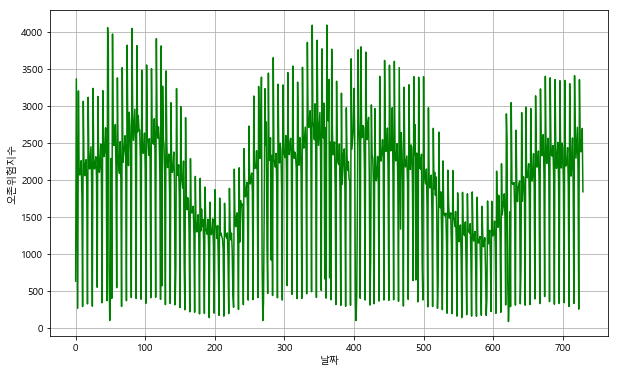

In [235]:
plt.figure(figsize=(10,6))
plt.plot(poplusone.index,poplusone['발생건수(건)'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('오존위험지수')
plt.grid()
plt.show()

In [236]:
poplusone['조건'] = poplusone['발생건수(건)']/1000
poplusone.head()

,날짜,시도지역코드,발생건수(건),조건
0,20160101,경북,628,0.628
1,20160102,경북,3365,3.365
2,20160103,경북,1899,1.899
3,20160104,경북,260,0.260
4,20160105,경북,3201,3.201


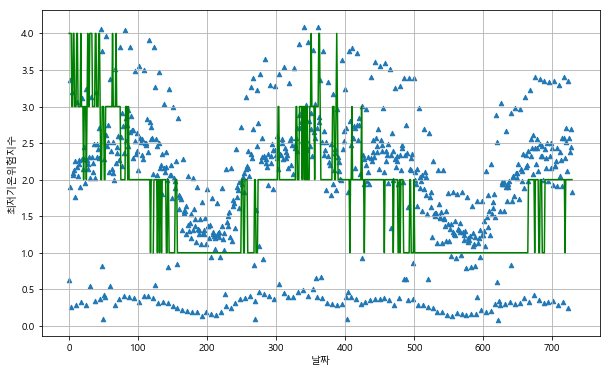

In [237]:
plt.figure(figsize=(10,6)) 
plt.plot(poplu.index,poplu['최저기온위험지수'], color = 'green') 
plt.scatter(poplusone.index, poplusone['조건'],s=20,marker='^') 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수')
plt.grid() 
plt.show() 

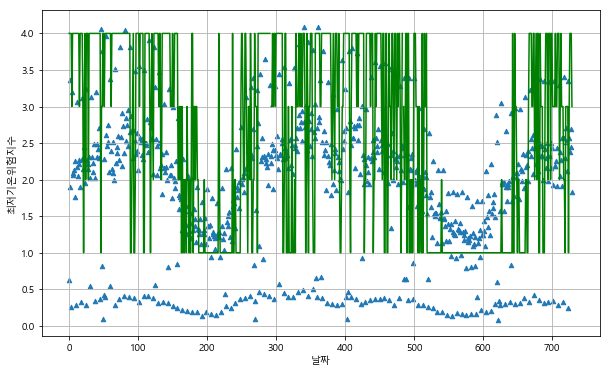

In [238]:
plt.figure(figsize=(10,6)) 
plt.plot(poplu.index,poplu['습도위험지수'], color = 'green') 
plt.scatter(poplusone.index, poplusone['조건'],s=20,marker='^') 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수')
plt.grid() 
plt.show() 

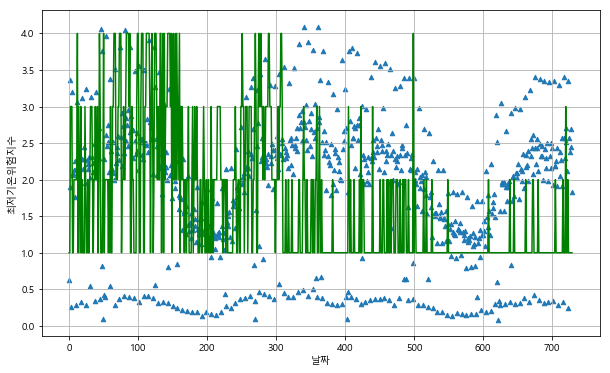

In [239]:
plt.figure(figsize=(10,6)) 
plt.plot(poplu.index,poplu['일교차위험지수'], color = 'green') 
plt.scatter(poplusone.index, poplusone['조건'],s=20,marker='^') 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수')
plt.grid() 
plt.show() 

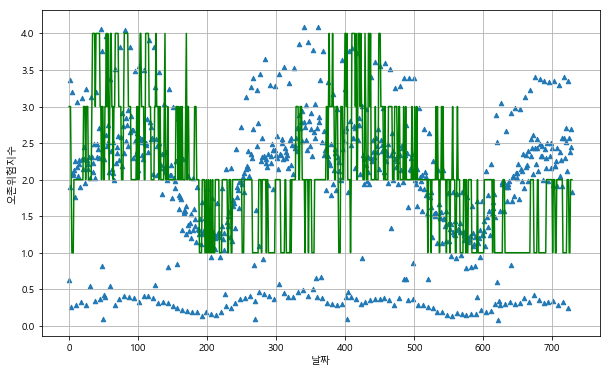

In [240]:
plt.figure(figsize=(10,6)) 
plt.plot(poplu6.index,poplu6['오존위험지수'], color = 'green') 
plt.scatter(poplusone.index, poplusone['조건'],s=20,marker='^') 
plt.xlabel('날짜') 
plt.ylabel('오존위험지수')
plt.grid() 
plt.show() 

#16년, 17년 각각 자료

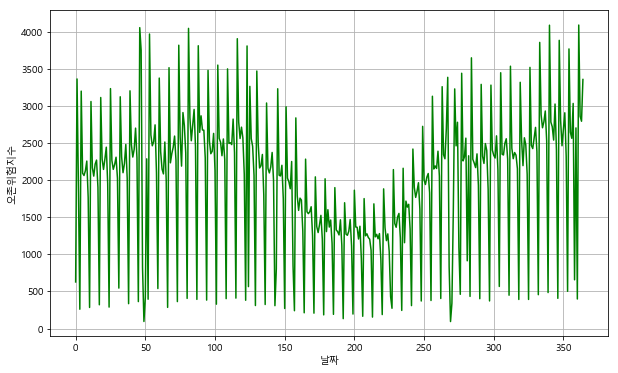

In [202]:
plt.figure(figsize=(10,6))
plt.plot(poplus16.index,poplus16['발생건수(건)'], color = 'green')
plt.xlabel('날짜')
plt.ylabel('오존위험지수')
plt.grid()
plt.show()

In [242]:
poplus16['조건'] = poplus16['발생건수(건)']/1000

In [243]:
poplus16.head()

,날짜,시도지역코드,발생건수(건),조건
0,20160101,경북,628,0.628
1,20160102,경북,3365,3.365
2,20160103,경북,1899,1.899
3,20160104,경북,260,0.260
4,20160105,경북,3201,3.201


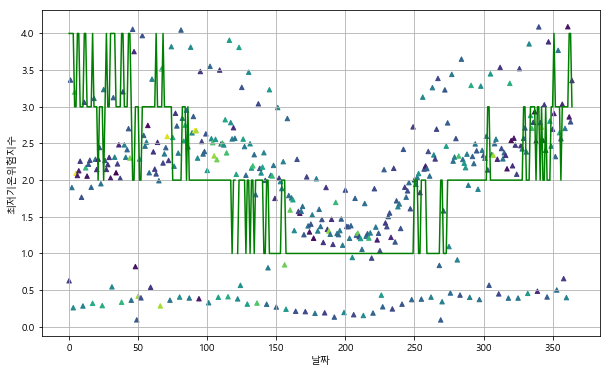

In [244]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['최저기온위험지수'], color = 'green')
plt.scatter(poplus16.index,poplus16['조건'],s=20,c=colormap,marker='^') 
plt.xlabel('날짜')
plt.ylabel('최저기온위험지수')
plt.grid()
plt.show()

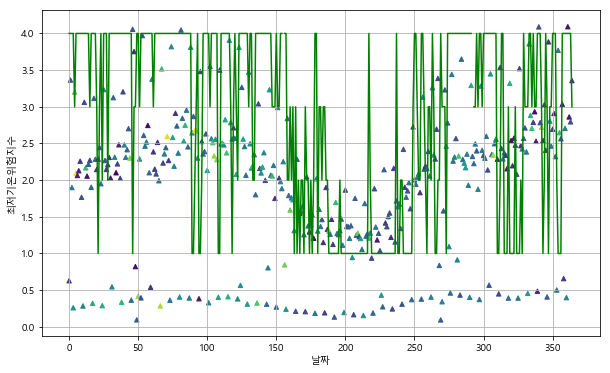

In [245]:
plt.figure(figsize=(10,6))
plt.plot(poplu2.index,poplu2['습도위험지수'], color = 'green')
plt.scatter(poplus16.index,poplus16['조건'],s=20,c=colormap,marker='^') 
plt.xlabel('날짜')
plt.ylabel('최저기온위험지수')
plt.grid()
plt.show()

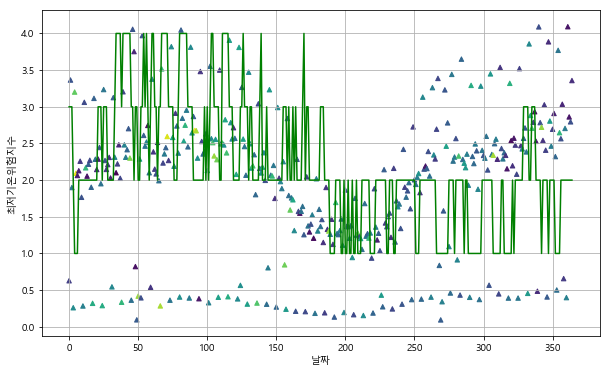

In [246]:
plt.figure(figsize=(10,6))
plt.plot(poplu4.index,poplu4['오존위험지수'], color = 'green')
plt.scatter(poplus16.index,poplus16['조건'],s=20,c=colormap,marker='^') 
plt.xlabel('날짜')
plt.ylabel('최저기온위험지수')
plt.grid()
plt.show()

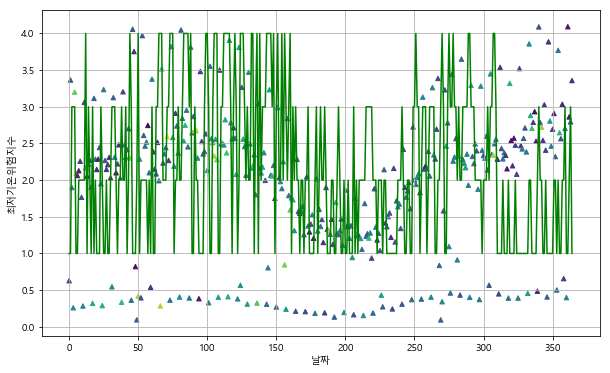

In [215]:
plt.figure(figsize=(10,6)) 
plt.plot(poplu2.index, poplu2['일교차위험지수'], color = 'green') 
plt.scatter(poplus16.index,poplus16['조건'],s=20,c=colormap,marker='^') 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.grid() 
plt.show() 